# Es 21_1

In questo esercizio è stato chiesto di valutare $$\int_{0}^{1} \frac{\pi}{2}cos\big(\frac{{\pi}x}{2}\big)dx$$ utilizzando l'uniform distibution sampling ($p(x)=1$) e l'importance sampling technique.
Il primo grafico mostra la valutazione tramite il uniform distibution sampling, mentre il secondo mostra l'importance sampling technique.
Per il primo è stato deciso di usare la funzione $2(1-x)$ come probabilità $p(x)$ nell'intervallo $x \in (0,1)$, correttamente normalizzata.
Perciò la funzione integranda da valutare diventa $\frac{\pi}{2}\frac{cos(\frac{{\pi}x}{2})}{-2x+2}$.
Per campionare $p(x)$, è stata poi invertita la sua funzione cumulativa, facendo attenzione a scegliere l'inverso appropriato, che è $y=1-\sqrt{1-x}$, dove x è uniformemente distribuito in $[0,1)$.
Come aspettato, la tecnica dell'importance sampling technique è più precisa dell'uniform distibution sampling.









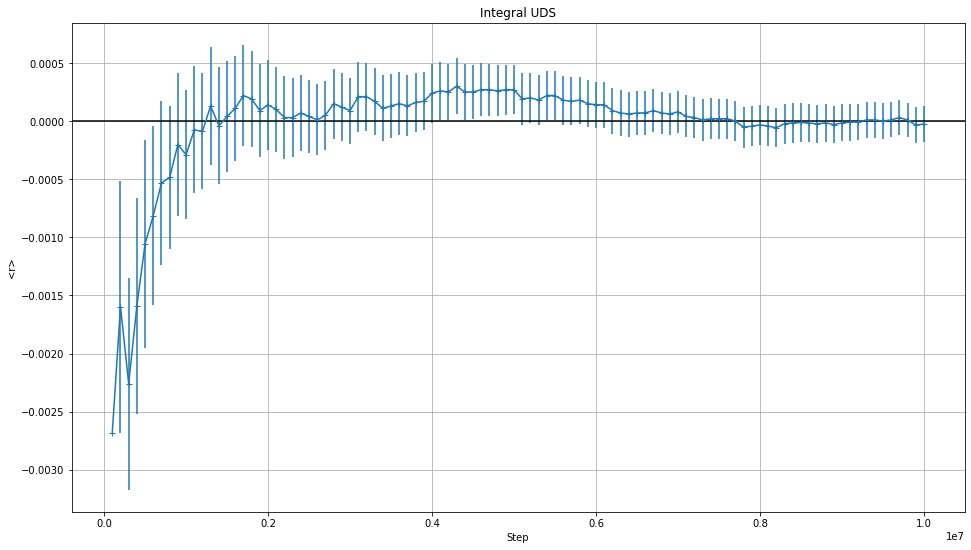

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, sum, error = np.loadtxt("int_unif.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.rcParams['figure.figsize'] = [16,9]
plt.errorbar(x,sum-1,yerr=error, marker="+")

plt.title("Integral UDS")
plt.xlabel('Step')
plt.ylabel('<r>')
plt.grid(True)
plt.axhline(y=0, color='black')
plt.show()

# Es 21_2

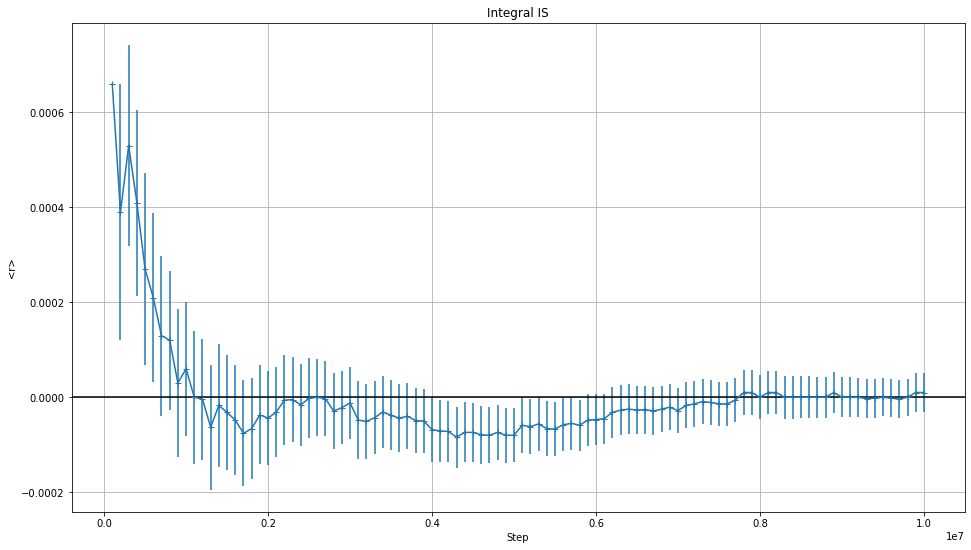

In [2]:
x, sum, error = np.loadtxt("int_import.dat", usecols=(0,1,2), delimiter=";", unpack='true')
plt.errorbar(x,sum-1,yerr=error, marker="+")
plt.title("Integral IS")
plt.xlabel('Step')
plt.ylabel('<r>')
plt.grid(True)
plt.axhline(y=0, color='black')
plt.show()

# Es 22_1


L'esercizio 2.2 riguarda il Random Walk. Il primo grafico mostra la distanza media dall'origine in funzione del numero di passi usando un reticolo discreto e usando un passo $a$ tale che $|a|=1$, preso lungo gli assi coordinati.
Il secondo grafico, analogo al primo, si distingue solo per l'utilizzo di un reticolo continuo. Ciò è ottenuito campionando i passi in coordinate sferiche.<br>
Le coordinate sferiche sono generate come segue:

    double phi = rnd.Rannyu(0,2*M_PI);
    double theta = acos(1-2*rnd.Rannyu());

    x_tot += sin(theta)*cos(phi);
    y_tot += sin(theta)*sin(phi);
    z_tot += cos(theta);

Entrambi i grafici appaiono come previsto. Si può vedere che la distanza media dall'origine segue la funzione $f(x)=k\sqrt{x}$.
L'incertezza statistica aumenta con l'aumentare del numero di passi, questo è prevedibile poiché più passi casuali vengono considerati, più si moltiplicano le possibili combinazioni per tutti i passi precedenti.

optimized parameters [k] =
[0.92484997]
parameters uncertainty =
[0.00018564]


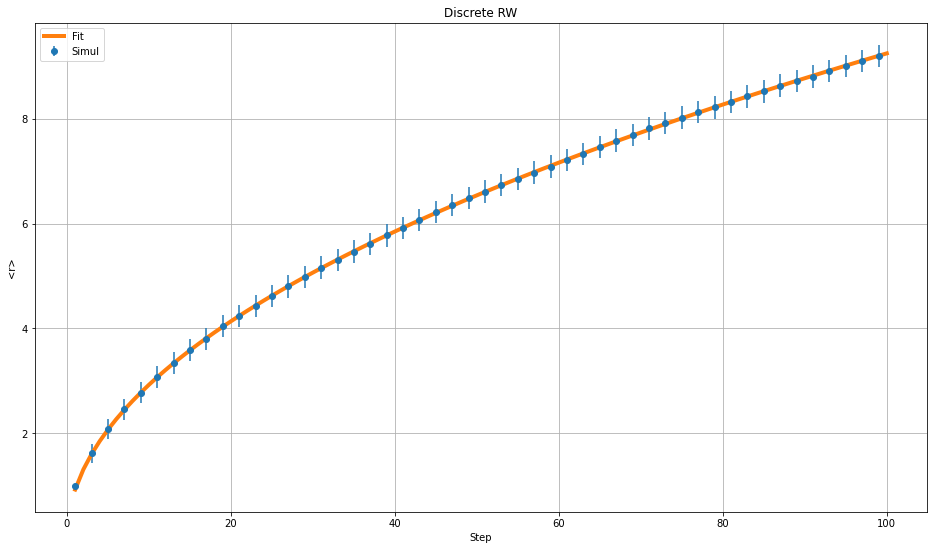

In [3]:
from scipy.optimize import curve_fit
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

step, r, error = np.loadtxt("rnd_wlk_disc.dat", usecols=(0,1,2), delimiter=";", unpack='true')
p_opt, p_cov = curve_fit(f, step, r)
y_fit = f(step,p_opt[0])
plt.errorbar(step[::2],r[::2],yerr=error[::2], fmt = 'o', label="Simul")
print("optimized parameters [k] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.plot(step,y_fit, linewidth = 4, label="Fit")
plt.title("Discrete RW")
plt.xlabel('Step')
plt.ylabel('<r>')
plt.grid(1)
plt.legend()
plt.show()

# Es 22_2

optimized parameters [k] =
[0.92046839]
parameters uncertainty =
[0.00023838]


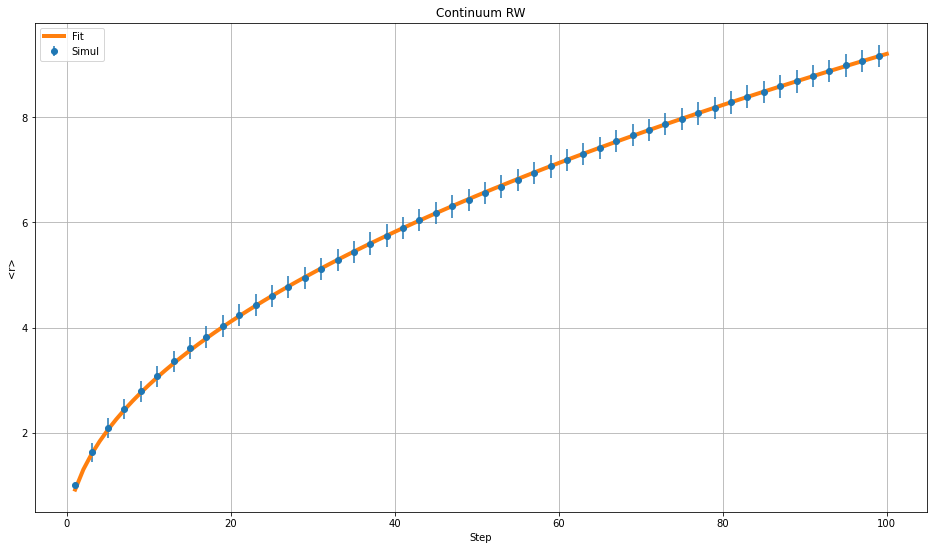

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def f(x,k):  # defining the fitting function
    return k * np.sqrt(x)

step, r, error = np.loadtxt("rnd_wlk_continuum.dat", usecols=(0,1,2), delimiter=";", unpack='true')
p_opt, p_cov = curve_fit(f, step, r)
y_fit = f(step,p_opt[0])
plt.errorbar(step[::2],r[::2],yerr=error[::2], fmt = 'o', label="Simul")
print("optimized parameters [k] =")
print(p_opt)
print("parameters uncertainty =")
print(np.sqrt(np.diagonal(p_cov)))
plt.plot(step,y_fit, linewidth = 4, label="Fit")
plt.title("Continuum RW")
plt.xlabel('Step')
plt.ylabel('<r>')
plt.grid(1)
plt.legend()
plt.show()

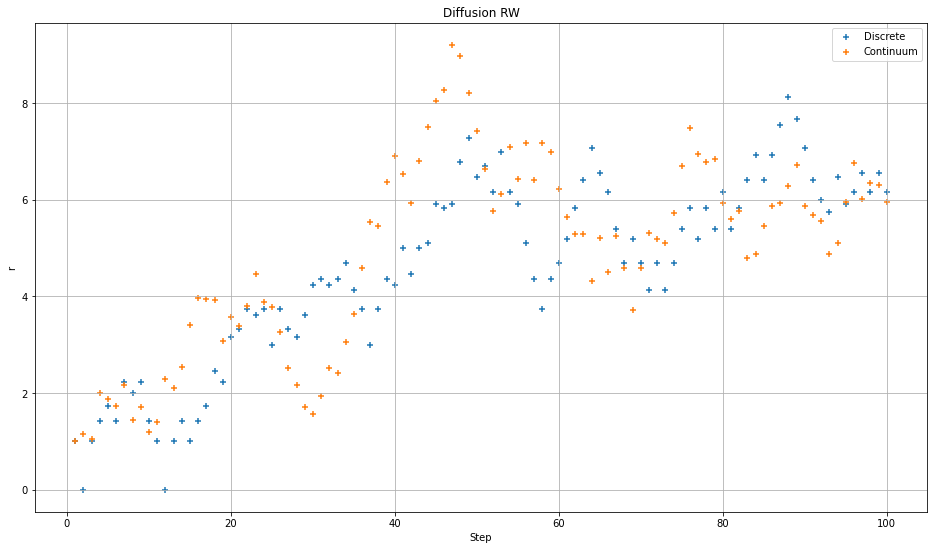

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

x, f = np.loadtxt("rnd_wlk_disc_step.dat", usecols=(0,1), delimiter=";", unpack='true')
x1, f1 = np.loadtxt("rnd_wlk_continuum_step.dat", usecols=(0,1), delimiter=";", unpack='true')
plt.scatter(x, f, marker="+", label ="Discrete")
plt.scatter(x1, f1, marker="+", label ="Continuum")
plt.xlabel('Step')
plt.ylabel('r')
plt.title("Diffusion RW")
plt.legend()
plt.grid(True)
plt.show()